In [1]:
from attack_correlation import *
from data_loader import data_load_into_graph as load
from utils import save_graph, load_graph
from graph_plotter import plot_graph
from factor_graph import *
from pprint import pprint

G, data = load()
# This is a bit pointless rn but works: save_graph(G, "cached_graphs/data_graph.pkl")
# G = load_graph("cached_graphs/data_graph.pkl")

In [2]:
#H = attack_correlation(G, data)

#save_graph(H, "cached_graphs/attack_correlation_graph.pkl")
H = load_graph("cached_graphs/attack_correlation_graph.pkl")

There are 635 subgraphs.


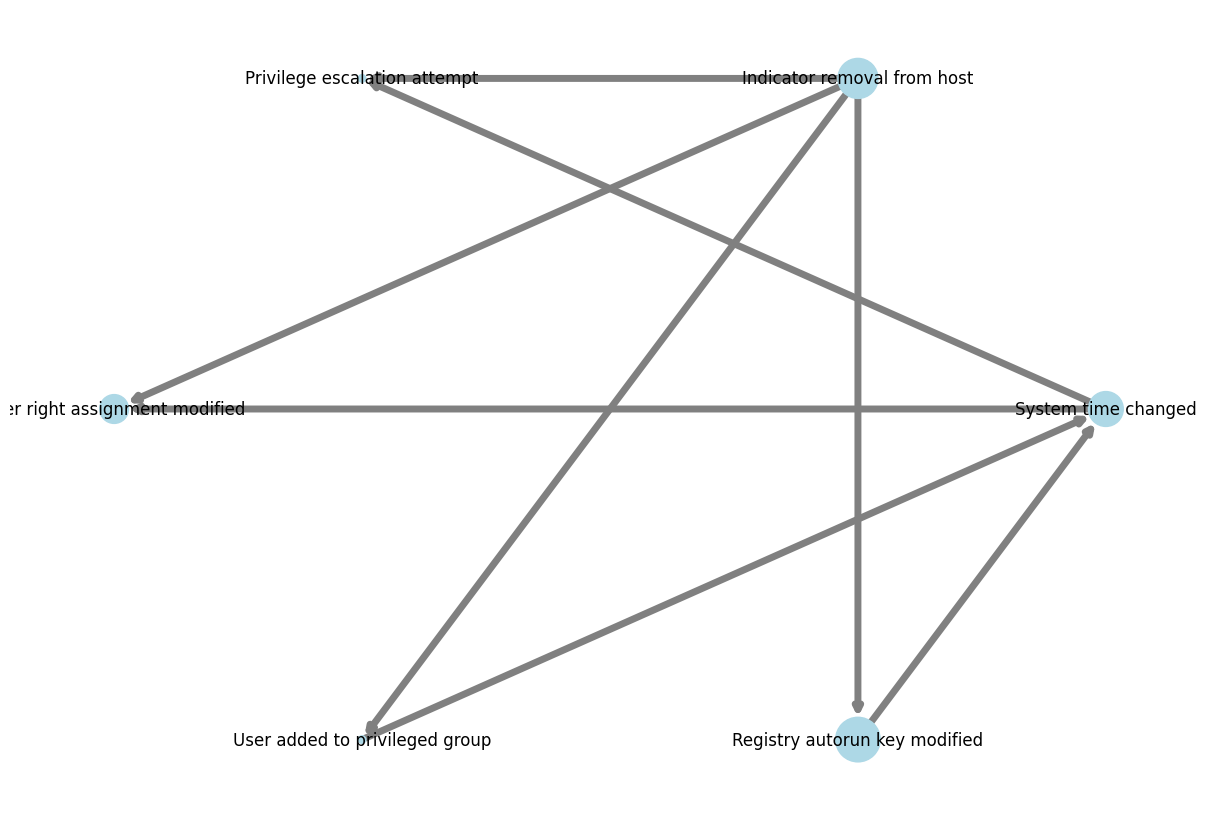

In [3]:
# Extract components
components = list(nx.connected_components(H.to_undirected()))
components.sort(key=len, reverse=True)
print("There are", len(components), "subgraphs.")

# Take the some component and create a subgraph
subgraph = H.subgraph(components[5])

#plot_graph(subgraph, node_label="type")
plot_graph(subgraph)

In [4]:
# Create list of all subgraphs and feed into pipeline

all_event_subgraphs = []

for i, component in enumerate(components):
  subgraph = H.subgraph(component)
  alerts = [event for event in data['events'] if event['id'] in subgraph.nodes()]
  fg = FactorGraph(alerts)
  m = Messages()
  # v = fg.variables["Collection"]
  # # print(m.marginal(v))
  # # v = fg.variables["Credential Access"]
  # # print(m.marginal(v))
  marginals = m.marginals(fg)
  #pprint(marginals)
  event_subgraph = {"Factor graph": fg,
                    "Marginals"   : marginals,
                    "Index"       : i, # This index is sorted by subgraph size.
                    "Subgraph"    : subgraph}
  all_event_subgraphs.append(event_subgraph)

print("Processed", len(all_event_subgraphs), "subgraphs!")

TypeError: list indices must be integers or slices, not str

In [7]:
pprint(all_event_subgraphs)

[{'Factor graph': <factor_graph.FactorGraph object at 0x0000011BBDF28D30>,
  'Index': 0,
  'Marginals': {'Collection': array([0.9294999, 0.0705001]),
                'Exfiltration': array([0.06351334, 0.93648666]),
                'Initial Access': array([0.99362903, 0.00637097]),
                'Privilege Escalation': array([0.38248016, 0.61751984])},
  'Message': <factor_graph.Messages object at 0x0000011BBDF28D90>,
  'Subgraph': <networkx.classes.digraph.DiGraph object at 0x0000011BBD69FC70>},
 {'Factor graph': <factor_graph.FactorGraph object at 0x0000011BBDE62DC0>,
  'Index': 1,
  'Marginals': {'Collection': array([0.91938029, 0.08061971]),
                'Defense Evasion': array([0.49473535, 0.50526465]),
                'Exfiltration': array([0.03400054, 0.96599946]),
                'Privilege Escalation': array([0.11602788, 0.88397212])},
  'Message': <factor_graph.Messages object at 0x0000011BBDE62160>,
  'Subgraph': <networkx.classes.digraph.DiGraph object at 0x0000011BBDE